In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import missingno as msno
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [172]:
print(tf.__version__)

2.8.0


In [173]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [174]:
df = pd.read_excel('/content/drive/MyDrive/skripsi ghanes/Dataset.xlsx', sheet_name='Indonesia (2)')
df.head()

,DEPARTURE DATE,Unnamed: 1,BUYER,Unnamed: 3,LNG LOADED (MMBTU),Unnamed: 5,PRICE (PER MMBTU),TOTAL REVENUE ($),NILAI KURS $ ke Rp,TOTAL REVENUE (Rp),AKUMULASI REVENUE/BULAN,PANDEMI,Unnamed: 12,Unnamed: 13
0,2016-04-07,NaN,PLN,NaN,447420.0,NaN,28.709758,12845320.08,13131.0,168671897991,NaN,NaN,NaN,NaN
1,2016-04-16,NaN,Regas,NaN,2926050.0,NaN,25.834308,75592477.89,13100.0,990261460307,NaN,NaN,NaN,NaN
2,2016-04-28,NaN,Regas,NaN,2927590.0,NaN,25.843791,75660024.97,13138.0,994021408053,2.152955e+12,NaN,NaN,6301060.0
3,2016-05-11,NaN,Regas,NaN,2934040.0,NaN,30.802153,90374748.22,13205.0,1193398550191,NaN,NaN,NaN,NaN
4,2016-05-21,NaN,Regas,NaN,2936990.0,NaN,28.672495,84210831.46,13505.0,1137267278862,NaN,NaN,NaN,NaN


# Data Preparation

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DEPARTURE DATE           243 non-null    datetime64[ns]
 1   Unnamed: 1               0 non-null      float64       
 2   BUYER                    243 non-null    object        
 3   Unnamed: 3               0 non-null      float64       
 4   LNG LOADED (MMBTU)       243 non-null    float64       
 5   Unnamed: 5               0 non-null      float64       
 6   PRICE (PER MMBTU)        243 non-null    float64       
 7   TOTAL REVENUE ($)        243 non-null    float64       
 8   NILAI KURS $ ke Rp       243 non-null    float64       
 9   TOTAL REVENUE (Rp)       243 non-null    int64         
 10  AKUMULASI REVENUE/BULAN  69 non-null     float64       
 11  PANDEMI                  76 non-null     object        
 12  Unnamed: 12              0 non-null 

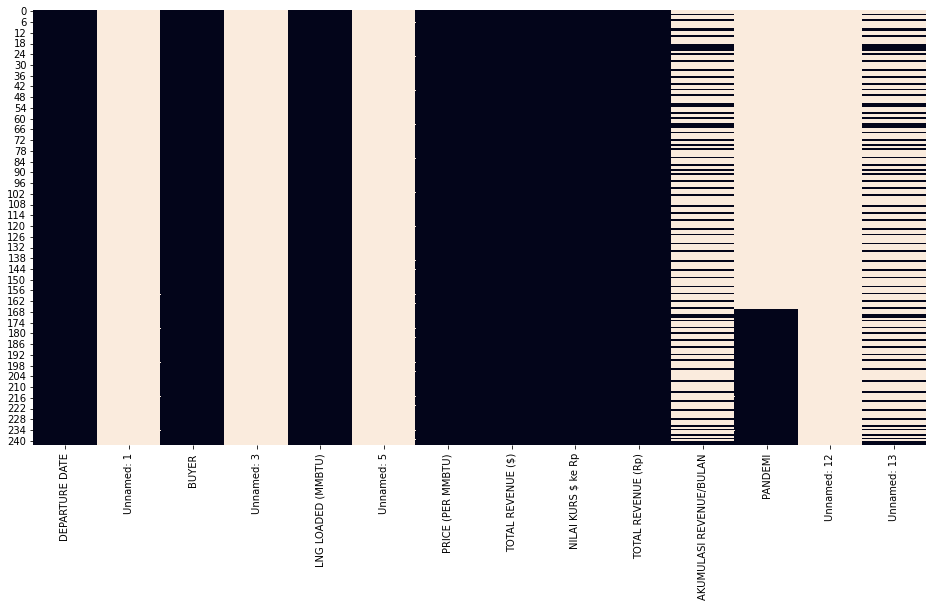

In [176]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), cbar=False)

In [177]:
name_columns_using = ['DEPARTURE DATE', 'TOTAL REVENUE (Rp)', 'PANDEMI' ]
df_crop = df[name_columns_using]
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DEPARTURE DATE      243 non-null    datetime64[ns]
 1   TOTAL REVENUE (Rp)  243 non-null    int64         
 2   PANDEMI             76 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ KB


In [178]:
df_crop['PANDEMI'] = df_crop['PANDEMI'].replace({np.nan: 'NORMAL'})
df_crop.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DEPARTURE DATE,TOTAL REVENUE (Rp),PANDEMI
0,2016-04-07,168671897991,NORMAL
1,2016-04-16,990261460307,NORMAL
2,2016-04-28,994021408053,NORMAL
3,2016-05-11,1193398550191,NORMAL
4,2016-05-21,1137267278862,NORMAL


In [179]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DEPARTURE DATE      243 non-null    datetime64[ns]
 1   TOTAL REVENUE (Rp)  243 non-null    int64         
 2   PANDEMI             243 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.8+ KB


In [180]:
df_crop['PANDEMI'].value_counts()

NORMAL                  167
PPKM MIKRO               25
PSBB TRANSASISI           9
PSSB TRANSISI FASE 2      8
PPKM                      8
PSBB                      6
PSBB KETAT                6
PPKM LEVEL 2, 3 & 4       4
PPKM LEVEL 1, 2 & 3       4
PPKM DARURAT              3
PPKM LEVEL 3 & 4          3
Name: PANDEMI, dtype: int64

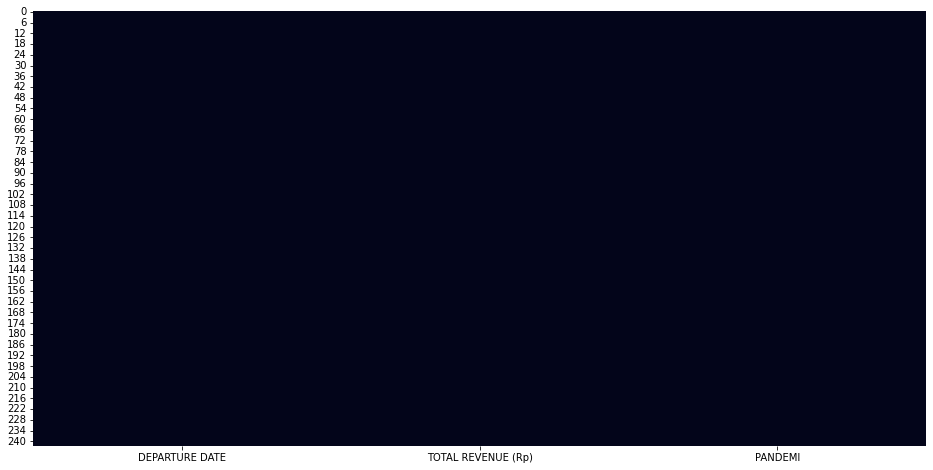

In [181]:
plt.figure(figsize=(16,8))
sns.heatmap(df_crop.isnull(), cbar=False)

In [182]:
df_crop.set_index('DEPARTURE DATE', inplace=True)
df_crop.head()

,TOTAL REVENUE (Rp),PANDEMI
DEPARTURE DATE,,
2016-04-07,168671897991,NORMAL
2016-04-16,990261460307,NORMAL
2016-04-28,994021408053,NORMAL
2016-05-11,1193398550191,NORMAL
2016-05-21,1137267278862,NORMAL


In [183]:
df_crop['day_of_month'] = df_crop.index.day
df_crop['day_of_week'] = df_crop.index.dayofweek
df_crop['month'] = df_crop.index.month
df_crop['year'] = df_crop.index.year
df_crop = df_crop.reset_index()
df_crop.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,DEPARTURE DATE,TOTAL REVENUE (Rp),PANDEMI,day_of_month,day_of_week,month,year
0,2016-04-07,168671897991,NORMAL,7,3,4,2016
1,2016-04-16,990261460307,NORMAL,16,5,4,2016
2,2016-04-28,994021408053,NORMAL,28,3,4,2016
3,2016-05-11,1193398550191,NORMAL,11,2,5,2016
4,2016-05-21,1137267278862,NORMAL,21,5,5,2016


# Explonatory Data Analysis

In [184]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

## History Revenue 

No handles with labels found to put in legend.


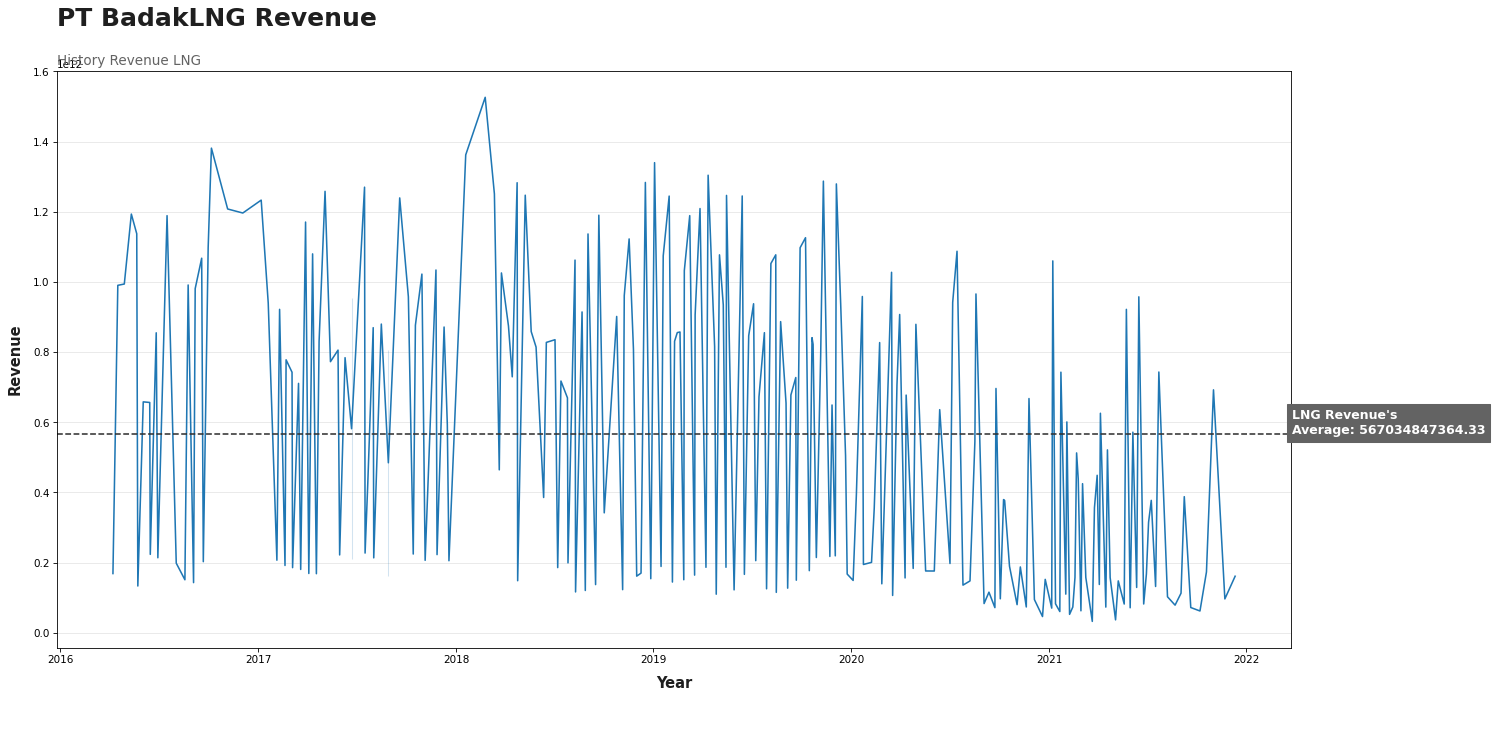

In [185]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=75)
mean_revenue_rp = df_crop['TOTAL REVENUE (Rp)'].mean()

line_revenue_history = sns.lineplot(data=df_crop, x='DEPARTURE DATE', y='TOTAL REVENUE (Rp)',  ax=ax, palette=colors_mix[:9])
line_revenue_mean = ax.axhline(mean_revenue_rp, linestyle='--', alpha=1, color=colors_dark[1])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Year", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Revenue", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="LNG Revenue's\nAverage: {:.2f}".format(mean_revenue_rp),
    x=xmax+0.5,
    y=mean_revenue_rp,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)

plt.text(s="PT BadakLNG Revenue", ha='left', x=xmin, y=ymax*1.08, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("History Revenue LNG", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

## Revenue by Year

In [186]:
df_year = pd.pivot_table(data=df_crop,index=['year'], aggfunc=np.mean)
df_year = df_year.reset_index()
df_year

,year,TOTAL REVENUE (Rp),day_of_month,day_of_week,month
0,2016,7.404471e+11,14.956522,3.217391,7.217391
1,2017,6.541785e+11,16.073171,3.097561,6.292683
2,2018,7.252107e+11,16.277778,3.388889,7.250000
3,2019,6.913001e+11,16.618182,2.636364,6.581818
4,2020,3.945960e+11,15.658537,3.317073,6.463415
5,2021,2.900072e+11,14.297872,2.872340,5.042553


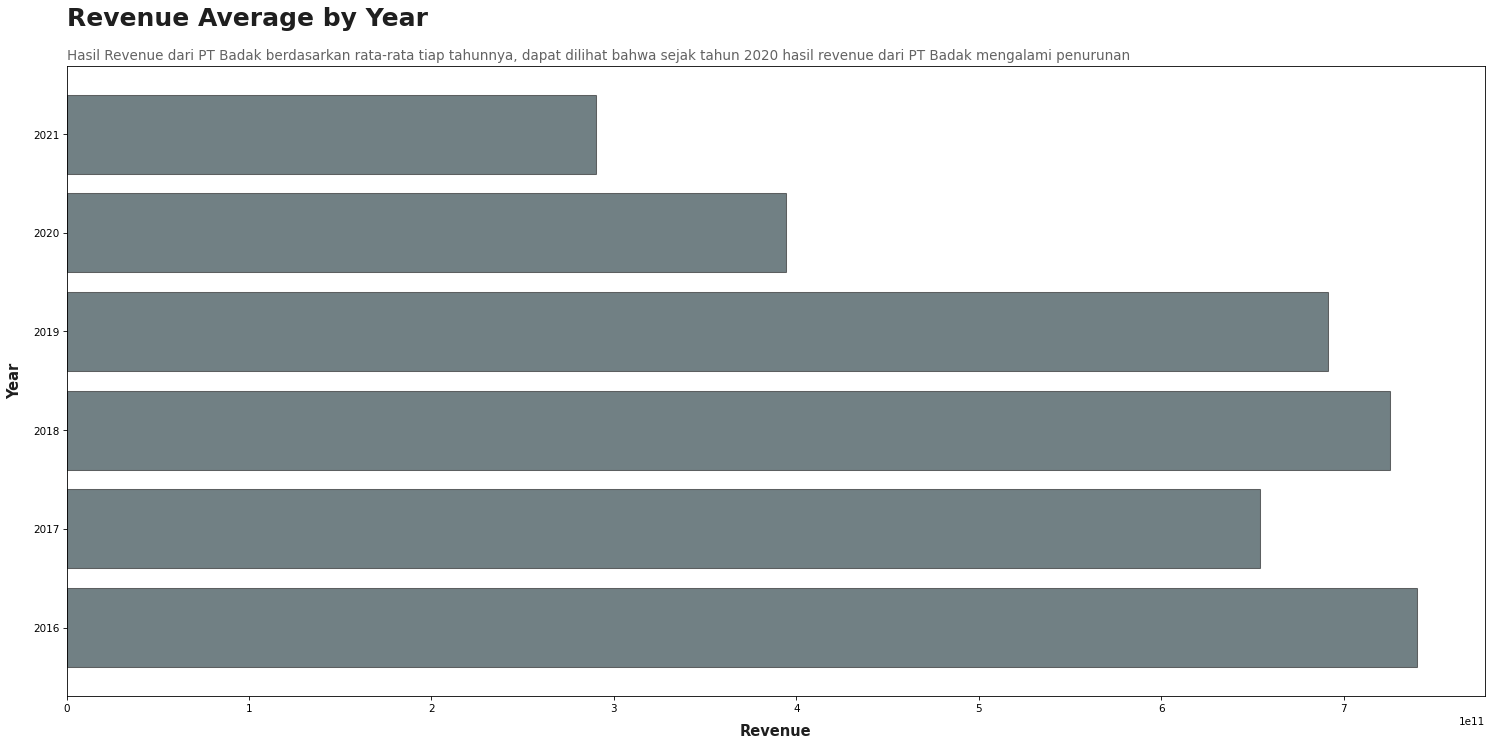

In [187]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=75)
bars_year_revenue = ax.barh(df_year['year'], df_year['TOTAL REVENUE (Rp)'],  color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.set_xlabel("Revenue", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Year", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

plt.text(s="Revenue Average by Year", ha='left', x=xmin, y=ymax*1.0002, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Hasil Revenue dari PT Badak berdasarkan rata-rata tiap tahunnya, dapat dilihat bahwa sejak tahun 2020 hasil revenue dari PT Badak mengalami penurunan", loc='left', fontsize=13, color=colors_dark[2])
plt.tight_layout()
plt.show()

## Revenue by Month

In [188]:
df_month = pd.pivot_table(data=df_crop,index=['month'], aggfunc=np.mean)
df_month = df_month.reset_index()
df_month

,month,TOTAL REVENUE (Rp),day_of_month,day_of_week,year
0,1,6.934140e+11,15.250000,3.437500,2019.562500
1,2,4.983138e+11,15.318182,3.136364,2019.409091
2,3,6.103817e+11,17.909091,2.090909,2019.136364
3,4,5.525952e+11,16.500000,3.333333,2018.708333
4,5,6.401930e+11,17.619048,2.809524,2018.571429
5,6,5.371997e+11,16.550000,3.200000,2018.450000
6,7,5.656415e+11,15.227273,3.363636,2018.909091
7,8,5.455078e+11,15.476190,2.619048,2018.238095
8,9,5.531071e+11,14.681818,3.636364,2018.545455
9,10,5.646281e+11,14.833333,2.444444,2018.722222


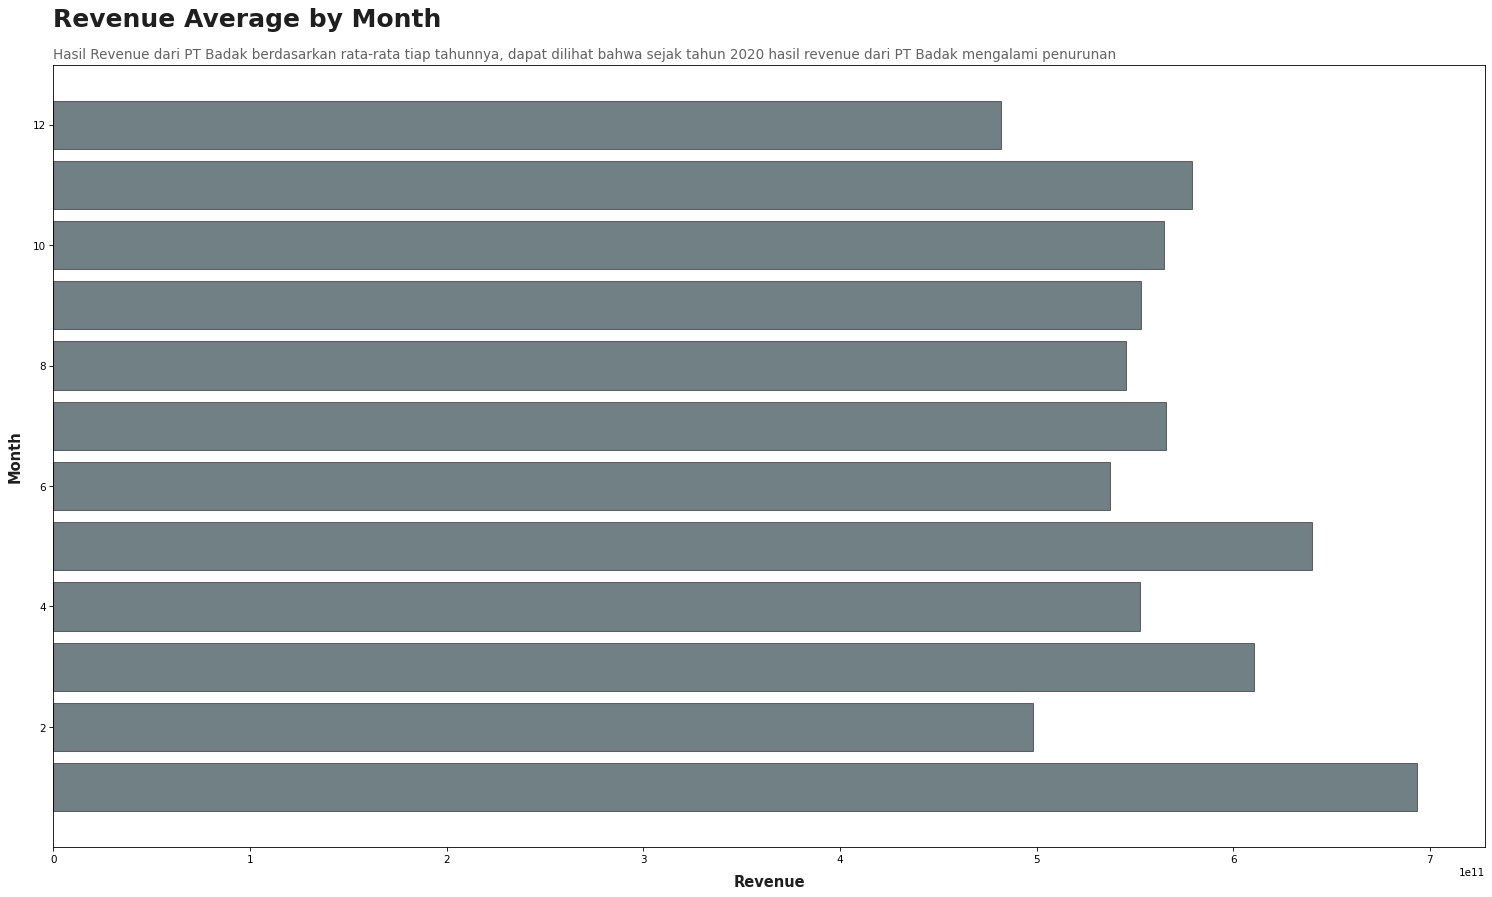

In [189]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=75)
bars_year_revenue = ax.barh(df_month['month'], df_month['TOTAL REVENUE (Rp)'],  color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.set_xlabel("Revenue", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Month", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

plt.text(s="Revenue Average by Month", ha='left', x=xmin, y=ymax*1.05, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Hasil Revenue dari PT Badak berdasarkan rata-rata tiap tahunnya, dapat dilihat bahwa sejak tahun 2020 hasil revenue dari PT Badak mengalami penurunan", loc='left', fontsize=13, color=colors_dark[2])
plt.tight_layout()
plt.show()

## Revenue by Day

In [190]:
df_day_of_week = pd.pivot_table(data=df_crop,index=['day_of_week'], aggfunc=np.mean)
df_day_of_week = df_day_of_week.reset_index()
df_day_of_week

,day_of_week,TOTAL REVENUE (Rp),day_of_month,month,year
0,0,4.307532e+11,17.000000,6.642857,2019.357143
1,1,5.421081e+11,14.216216,6.405405,2018.351351
2,2,5.924327e+11,18.650000,6.125000,2018.925000
3,3,6.522859e+11,15.282051,5.769231,2018.564103
4,4,6.012078e+11,15.640000,6.280000,2019.400000
5,5,5.997226e+11,14.000000,6.820513,2018.564103
6,6,5.175583e+11,15.314286,6.657143,2018.685714


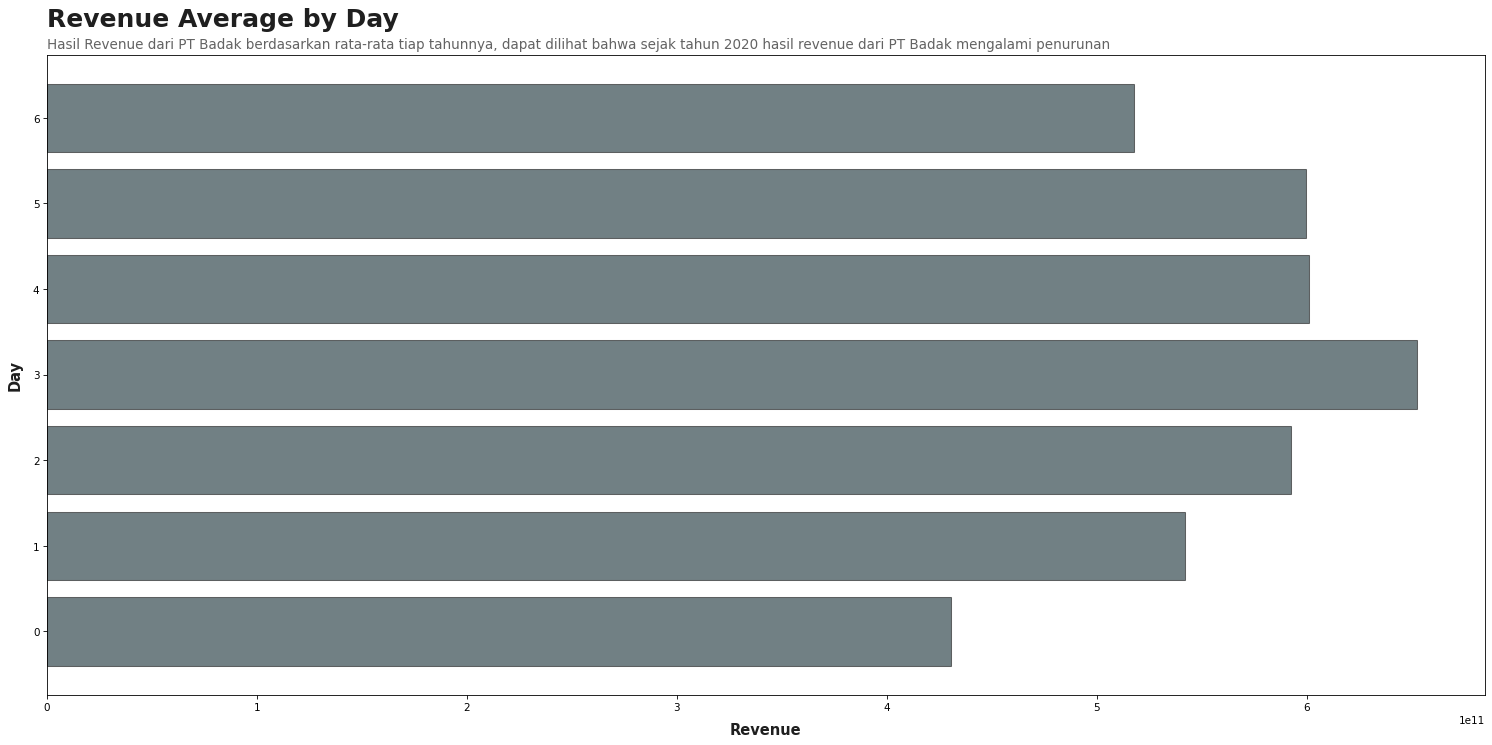

In [191]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=75)
bars_year_revenue = ax.barh(df_day_of_week['day_of_week'], df_day_of_week['TOTAL REVENUE (Rp)'],  color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.set_xlabel("Revenue", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Day", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

plt.text(s="Revenue Average by Day", ha='left', x=xmin, y=ymax*1.05, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Hasil Revenue dari PT Badak berdasarkan rata-rata tiap tahunnya, dapat dilihat bahwa sejak tahun 2020 hasil revenue dari PT Badak mengalami penurunan", loc='left', fontsize=13, color=colors_dark[2])
plt.tight_layout()
plt.show()

## Revenue by Pandemi Level

In [192]:
df_pandemi_level = pd.pivot_table(data=df_crop,index=['PANDEMI'], aggfunc=np.mean)
df_pandemi_level = df_pandemi_level.reset_index()
df_pandemi_level

,PANDEMI,TOTAL REVENUE (Rp),day_of_month,day_of_week,month,year
0,NORMAL,6.823076e+11,16.329341,3.041916,6.413174,2017.952096
1,PPKM,3.473579e+11,10.375000,2.250000,1.375000,2021.000000
2,PPKM DARURAT,2.745931e+11,10.000000,5.000000,7.000000,2021.000000
3,"PPKM LEVEL 1, 2 & 3",2.807580e+11,13.250000,1.500000,11.000000,2021.000000
4,"PPKM LEVEL 2, 3 & 4",1.585696e+11,9.250000,2.000000,9.250000,2021.000000
5,PPKM LEVEL 3 & 4,3.080745e+11,17.666667,5.333333,7.666667,2021.000000
6,PPKM MIKRO,2.938466e+11,16.640000,2.880000,4.040000,2021.000000
7,PSBB,3.746501e+11,16.333333,3.333333,4.500000,2020.000000
8,PSBB KETAT,2.894322e+11,13.833333,4.333333,9.500000,2020.000000
9,PSBB TRANSASISI,5.265171e+11,12.222222,3.000000,7.444444,2020.000000


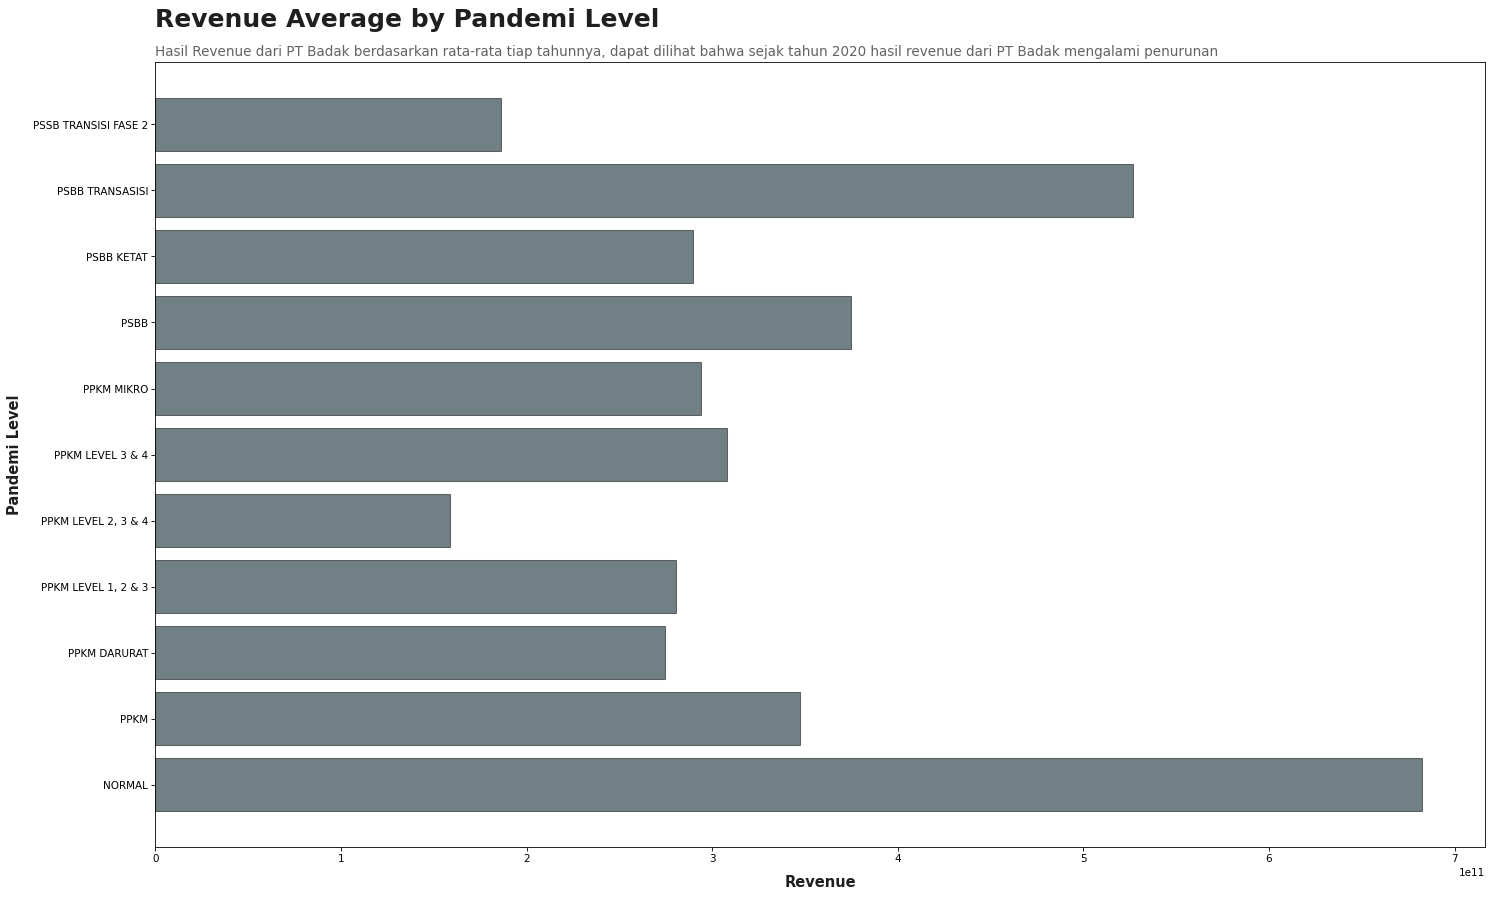

In [193]:
fig, ax = plt.subplots(figsize=(20, 12), dpi=75)
bars_year_revenue = ax.barh(df_pandemi_level['PANDEMI'], df_pandemi_level['TOTAL REVENUE (Rp)'],  color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

ax.set_xlabel("Revenue", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Pandemi Level", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

plt.text(s="Revenue Average by Pandemi Level", ha='left', x=xmin, y=ymax*1.05, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Hasil Revenue dari PT Badak berdasarkan rata-rata tiap tahunnya, dapat dilihat bahwa sejak tahun 2020 hasil revenue dari PT Badak mengalami penurunan", loc='left', fontsize=13, color=colors_dark[2])
plt.tight_layout()
plt.show()

# ANN - DATA (ANN SHEET)

In [194]:
df_ann_level = df_crop[df_crop['PANDEMI'] != 'NORMAL']
df_ann_level.head()

,DEPARTURE DATE,TOTAL REVENUE (Rp),PANDEMI,day_of_month,day_of_week,month,year
167,2020-04-10,156150696612,PSBB,10,4,4,2020
168,2020-04-12,677411706401,PSBB,12,6,4,2020
169,2020-04-25,183299742467,PSBB,25,5,4,2020
170,2020-04-30,879108981887,PSBB,30,3,4,2020
171,2020-05-18,176040291624,PSBB,18,0,5,2020


In [195]:
labelencoder = LabelEncoder()
df_ann_level['PANDEMI'] = labelencoder.fit_transform(df_ann_level['PANDEMI'])
df_ann_level.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DEPARTURE DATE,TOTAL REVENUE (Rp),PANDEMI,day_of_month,day_of_week,month,year
167,2020-04-10,156150696612,6,10,4,4,2020
168,2020-04-12,677411706401,6,12,6,4,2020
169,2020-04-25,183299742467,6,25,5,4,2020
170,2020-04-30,879108981887,6,30,3,4,2020
171,2020-05-18,176040291624,6,18,0,5,2020


In [196]:
df_ann_level.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 167 to 242
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DEPARTURE DATE      76 non-null     datetime64[ns]
 1   TOTAL REVENUE (Rp)  76 non-null     int64         
 2   PANDEMI             76 non-null     int64         
 3   day_of_month        76 non-null     int64         
 4   day_of_week         76 non-null     int64         
 5   month               76 non-null     int64         
 6   year                76 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.8 KB


## Correlation Test - Date Feature


### Pearson Correlation

In [197]:
pearson_correlation = df_ann_level.corr(method='pearson')
pearson_correlation

,TOTAL REVENUE (Rp),PANDEMI,day_of_month,day_of_week,month,year
TOTAL REVENUE (Rp),1.000000,0.042317,0.103363,-0.080408,-0.115837,-0.102930
PANDEMI,0.042317,1.000000,0.144153,0.094518,0.485835,-0.773295
day_of_month,0.103363,0.144153,1.000000,-0.000772,-0.062959,-0.006529
day_of_week,-0.080408,0.094518,-0.000772,1.000000,0.053973,-0.104865
month,-0.115837,0.485835,-0.062959,0.053973,1.000000,-0.486955
year,-0.102930,-0.773295,-0.006529,-0.104865,-0.486955,1.000000


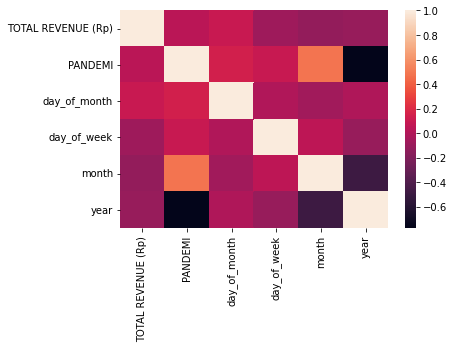

In [198]:
sns.heatmap(pearson_correlation)

### Spearman Correlation

In [199]:
spearman_correlation = df_ann_level.corr(method='spearman')
spearman_correlation

,TOTAL REVENUE (Rp),PANDEMI,day_of_month,day_of_week,month,year
TOTAL REVENUE (Rp),1.000000,0.113342,0.087287,-0.008410,-0.044711,-0.157426
PANDEMI,0.113342,1.000000,0.124326,0.085009,0.470457,-0.859177
day_of_month,0.087287,0.124326,1.000000,0.038919,-0.058819,-0.017920
day_of_week,-0.008410,0.085009,0.038919,1.000000,0.056119,-0.101819
month,-0.044711,0.470457,-0.058819,0.056119,1.000000,-0.488977
year,-0.157426,-0.859177,-0.017920,-0.101819,-0.488977,1.000000


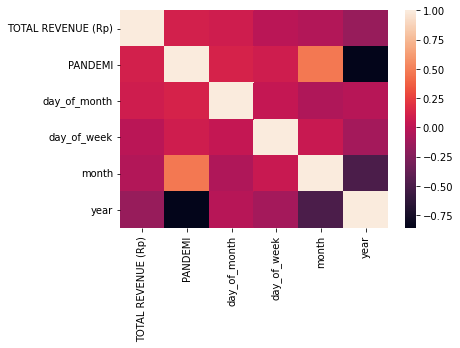

In [200]:
sns.heatmap(spearman_correlation)

## Model ANN

In [201]:
df_ann_level.head()

,DEPARTURE DATE,TOTAL REVENUE (Rp),PANDEMI,day_of_month,day_of_week,month,year
167,2020-04-10,156150696612,6,10,4,4,2020
168,2020-04-12,677411706401,6,12,6,4,2020
169,2020-04-25,183299742467,6,25,5,4,2020
170,2020-04-30,879108981887,6,30,3,4,2020
171,2020-05-18,176040291624,6,18,0,5,2020


## Standard Scaler

In [202]:
x = df_ann_level.drop(['DEPARTURE DATE', 'TOTAL REVENUE (Rp)', 'day_of_month'], axis='columns')

revenue_scaler = StandardScaler()
y = df_ann_level['TOTAL REVENUE (Rp)']
y = revenue_scaler.fit_transform(y.values.reshape(-1,1))
y = np.squeeze(y)

x.shape, y.shape

((76, 4), (76,))

In [203]:
len(x), len(y)

(76, 76)

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

### Model with Note Parameter

In [205]:
tf.random.set_seed(42)


# Build the model 
model_ann_sheet_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='tanh'),
  tf.keras.layers.Dense(10, activation='tanh'), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ann_sheet_1.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.SGD(learning_rate=0.4, momentum=0.9),
                          metrics=['mse'])

# Fit the model for 200 epochs (same as insurance_model_2)
model_ann_sheet_1.fit(x_train, y_train, batch_size=32, epochs=1000, verbose=2) 

Epoch 1/1000
2/2 - 1s - loss: 7.7225 - mse: 7.7225 - 635ms/epoch - 318ms/step
Epoch 2/1000
2/2 - 0s - loss: 8275.1748 - mse: 8275.1748 - 15ms/epoch - 8ms/step
Epoch 3/1000
2/2 - 0s - loss: 17119174.0000 - mse: 17119174.0000 - 11ms/epoch - 5ms/step
Epoch 4/1000
2/2 - 0s - loss: 35897253888.0000 - mse: 35897253888.0000 - 8ms/epoch - 4ms/step
Epoch 5/1000
2/2 - 0s - loss: 75274259529728.0000 - mse: 75274259529728.0000 - 18ms/epoch - 9ms/step
Epoch 6/1000
2/2 - 0s - loss: 157845356707577856.0000 - mse: 157845356707577856.0000 - 12ms/epoch - 6ms/step
Epoch 7/1000
2/2 - 0s - loss: 330991139819920293888.0000 - mse: 330991139819920293888.0000 - 18ms/epoch - 9ms/step
Epoch 8/1000
2/2 - 0s - loss: 694067248569418355048448.0000 - mse: 694067248569418355048448.0000 - 20ms/epoch - 10ms/step
Epoch 9/1000
2/2 - 0s - loss: 1455414165406587996927426560.0000 - mse: 1455414165406587996927426560.0000 - 15ms/epoch - 7ms/step
Epoch 10/1000
2/2 - 0s - loss: 3051906937480554733361191452672.0000 - mse: 3051906

#### Evaluation

In [206]:
y_pred_1 = model_ann_sheet_1.predict(x_test)
y_pred_1

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

### Model with Standard Parameter

In [207]:
tf.random.set_seed(42)


# Build the model 
model_ann_sheet_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ann_sheet_2.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
model_ann_sheet_2.fit(x_train, y_train,epochs=100, verbose=2) 

Epoch 1/100
2/2 - 0s - loss: 16616.3965 - mse: 16616.3965 - mae: 114.3945 - 475ms/epoch - 238ms/step
Epoch 2/100
2/2 - 0s - loss: 6573.9189 - mse: 6573.9189 - mae: 76.9406 - 11ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 9194.5977 - mse: 9194.5977 - mae: 94.8024 - 9ms/epoch - 5ms/step
Epoch 4/100
2/2 - 0s - loss: 745.2389 - mse: 745.2389 - mae: 24.1420 - 7ms/epoch - 4ms/step
Epoch 5/100
2/2 - 0s - loss: 3446.3638 - mse: 3446.3638 - mae: 57.6466 - 11ms/epoch - 5ms/step
Epoch 6/100
2/2 - 0s - loss: 4746.8955 - mse: 4746.8955 - mae: 68.6314 - 11ms/epoch - 5ms/step
Epoch 7/100
2/2 - 0s - loss: 905.3405 - mse: 905.3405 - mae: 26.4462 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 807.9872 - mse: 807.9872 - mae: 26.5331 - 11ms/epoch - 6ms/step
Epoch 9/100
2/2 - 0s - loss: 2530.0159 - mse: 2530.0159 - mae: 50.2792 - 9ms/epoch - 4ms/step
Epoch 10/100
2/2 - 0s - loss: 1182.3070 - mse: 1182.3070 - mae: 33.4344 - 10ms/epoch - 5ms/step
Epoch 11/100
2/2 - 0s - loss: 107.1769 - mse: 107.17

In [208]:
model_ann_sheet_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               500       
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


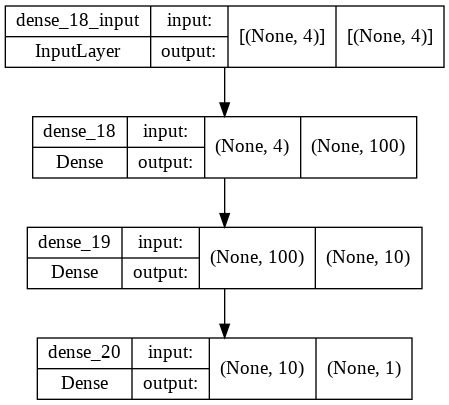

In [209]:
plot_model(model_ann_sheet_2, show_shapes=True)

#### Evaluation

In [210]:
model_ann_sheet_2.evaluate(x_test, y_test)

1/1 [==============================] - 0s 122ms/step - loss: 2.0180 - mse: 2.0180 - mae: 1.1211


[2.0179855823516846, 2.0179855823516846, 1.1211042404174805]

In [211]:
y_test

array([-0.46914292,  0.97845735, -0.60671646, -0.53690763,  0.14510407,
       -0.60035721,  1.4630799 , -0.56552419,  0.70689534, -0.55075738,
       -0.80103124, -0.82423304, -0.73943209,  0.78551688, -0.62913217,
        1.46150698,  2.63592819, -0.46965782, -0.69411314])

In [212]:
y_pred_2 = model_ann_sheet_2.predict(x_test)
y_pred_2

array([[ 0.48825887],
       [-1.8586912 ],
       [ 1.0782325 ],
       [ 0.4596802 ],
       [ 0.10173067],
       [ 0.00621879],
       [-0.5262313 ],
       [-0.04814218],
       [ 0.13043724],
       [ 1.2596295 ],
       [-0.62174195],
       [-0.96290004],
       [ 0.5250222 ],
       [ 1.148159  ],
       [-0.08137219],
       [-1.8665802 ],
       [ 1.1608894 ],
       [ 0.3927747 ],
       [-1.8171308 ]], dtype=float32)

In [213]:
y_test_inv = revenue_scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_2_inv = revenue_scaler.inverse_transform(y_pred_2)
y_test_inv.shape, y_pred_2_inv.shape 

((19, 1), (19, 1))

In [214]:
y_test_inv

array([[1.76040292e+11],
       [6.00924883e+11],
       [1.35661133e+11],
       [1.56150697e+11],
       [3.56327685e+11],
       [1.37527635e+11],
       [7.43166260e+11],
       [1.47751461e+11],
       [5.21218823e+11],
       [1.52085662e+11],
       [7.86278787e+10],
       [7.18179267e+10],
       [9.67078217e+10],
       [5.44294999e+11],
       [1.29081907e+11],
       [7.42704593e+11],
       [1.08740850e+12],
       [1.75889163e+11],
       [1.10009369e+11]])

In [215]:
y_pred_2_inv = y_pred_2_inv
y_pred_2_inv

array([[ 4.5704692e+11],
       [-2.3180550e+11],
       [ 6.3020984e+11],
       [ 4.4865880e+11],
       [ 3.4359719e+11],
       [ 3.1556351e+11],
       [ 1.5928431e+11],
       [ 2.9960805e+11],
       [ 3.5202282e+11],
       [ 6.8345161e+11],
       [ 1.3125101e+11],
       [ 3.1117818e+10],
       [ 4.6783729e+11],
       [ 6.5073394e+11],
       [ 2.8985472e+11],
       [-2.3412099e+11],
       [ 6.5447041e+11],
       [ 4.2902140e+11],
       [-2.1960712e+11]], dtype=float32)

In [216]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test.squeeze(),
                                        y_pred.squeeze()).numpy()
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test.squeeze(),
                                       y_pred.squeeze()).numpy()

In [217]:
MSE_ANN_Standard = mse(y_test_inv, y_pred_2_inv)
MAE_ANN_Standard = mae(y_test_inv, y_pred_2_inv)

print(f'Mean Squared Error : {MSE_ANN_Standard}')
print(f'Mean Absolute Error : {MAE_ANN_Standard}')

Mean Squared Error : 1.7384447603684356e+23
Mean Absolute Error : 329054617600.0


#### Visualization

In [218]:
def plot_predictions(real_data, predictions, title, subtitle):
  """
  Plots real data vs prediction.
  """
  y_test = real_data
  y_df = y_test.to_frame()
  y_df['TOTAL REVENUE PREDICTION'] = predictions

  y_df = y_df.reset_index()

  fig, ax = plt.subplots(figsize=(14, 8), dpi=75)
  line_real_data = ax.plot(y_df['index'], y_df['TOTAL REVENUE (Rp)'], alpha=1, marker='o', color=colors_blue[3], linewidth=3, label='Real Data')
  line_prediction_data = ax.plot(y_df['index'], y_df['TOTAL REVENUE PREDICTION'], alpha=1, marker='x', color=colors_red[3], linewidth=3, label='Predictions')
  
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=12)
  ax.grid(axis='y', alpha=0.3)
  ax.set_axisbelow(True)
  # ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
  ax.set_ylabel("Revenue", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

  xmin, xmax = ax.get_xlim()
  ymin, ymax = ax.get_ylim()
  plt.text(s=title, ha='left', x=xmin, y=ymax*1.1, fontsize=24, fontweight='bold', color=colors_dark[0])
  plt.title(subtitle, loc='left', fontsize=13, color=colors_dark[2])  
  plt.tight_layout()
  plt.show()

In [219]:
y_test_inv_series = pd.Series(y_test_inv.squeeze())
y_test_inv_series = y_test_inv_series.rename('TOTAL REVENUE (Rp)')

y_pred_2_inv = y_pred_2_inv.squeeze()

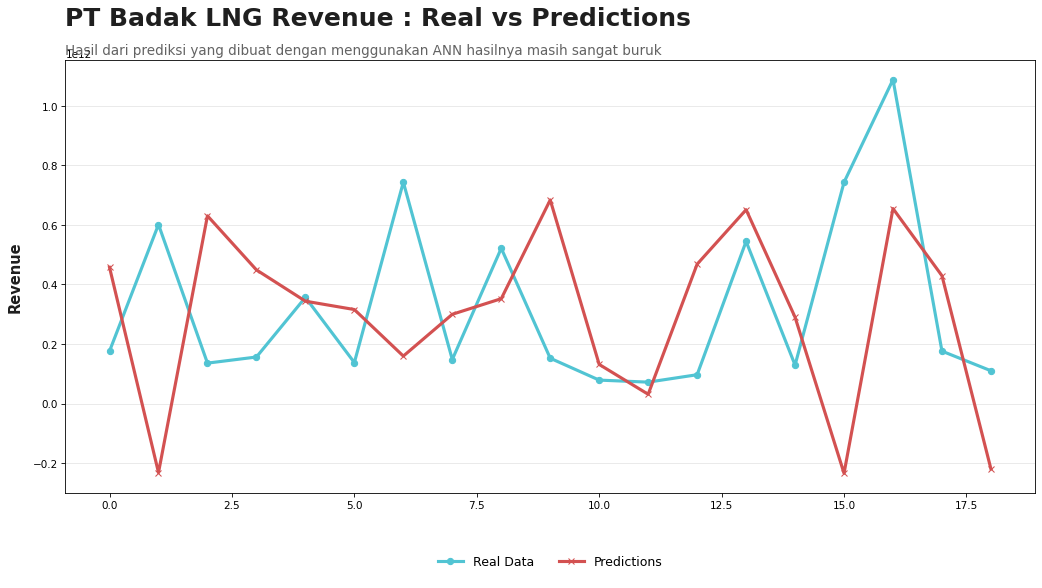

In [220]:
title_ann_standard = 'PT Badak LNG Revenue : Real vs Predictions'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN hasilnya masih sangat buruk'
plot_predictions(y_test_inv_series, y_pred_2_inv, title_ann_standard, subtitle_ann_standard)

### Model ANN with feature engineering

In [221]:
df_ann_ohe = df_crop[df_crop['PANDEMI'] != 'NORMAL']
df_ann_ohe.head()

,DEPARTURE DATE,TOTAL REVENUE (Rp),PANDEMI,day_of_month,day_of_week,month,year
167,2020-04-10,156150696612,PSBB,10,4,4,2020
168,2020-04-12,677411706401,PSBB,12,6,4,2020
169,2020-04-25,183299742467,PSBB,25,5,4,2020
170,2020-04-30,879108981887,PSBB,30,3,4,2020
171,2020-05-18,176040291624,PSBB,18,0,5,2020


#### One-Hot Encoding

In [222]:
df_ann_ohe = pd.get_dummies(df_ann_ohe, columns=['PANDEMI'], drop_first=True)
df_ann_ohe.head()

,DEPARTURE DATE,TOTAL REVENUE (Rp),day_of_month,day_of_week,month,year,PANDEMI_PPKM DARURAT,"PANDEMI_PPKM LEVEL 1, 2 & 3","PANDEMI_PPKM LEVEL 2, 3 & 4",PANDEMI_PPKM LEVEL 3 & 4,PANDEMI_PPKM MIKRO,PANDEMI_PSBB,PANDEMI_PSBB KETAT,PANDEMI_PSBB TRANSASISI,PANDEMI_PSSB TRANSISI FASE 2
167,2020-04-10,156150696612,10,4,4,2020,0,0,0,0,0,1,0,0,0
168,2020-04-12,677411706401,12,6,4,2020,0,0,0,0,0,1,0,0,0
169,2020-04-25,183299742467,25,5,4,2020,0,0,0,0,0,1,0,0,0
170,2020-04-30,879108981887,30,3,4,2020,0,0,0,0,0,1,0,0,0
171,2020-05-18,176040291624,18,0,5,2020,0,0,0,0,0,1,0,0,0


#### Normalization

In [223]:
features_ann_fe = df_ann_ohe.drop(['DEPARTURE DATE', 'TOTAL REVENUE (Rp)', 'day_of_month'], axis='columns')
label_ann_fe = df_ann_ohe['TOTAL REVENUE (Rp)']

##### Revenue Using StandardScaler, Feature using MinMaxScaler

In [224]:
revenue_fe = StandardScaler()
label_ann_fe = revenue_fe.fit_transform(label_ann_fe.values.reshape(-1,1))

In [225]:
features_fe_train = MinMaxScaler()
features_fe_test = MinMaxScaler()

x_train, x_test, y_train, y_test = train_test_split(features_ann_fe,label_ann_fe, test_size=0.25, random_state=42)


x_train = features_fe_train.fit_transform(x_train)
x_test = features_fe_test.fit_transform(x_test)

#### Model

In [226]:
tf.random.set_seed(42)


# Build the model 
model_ann_sheet_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1) 
])

# Compile the model
model_ann_sheet_3.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse', 'mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
model_ann_sheet_3.fit(x_train, y_train,epochs=100, verbose=0) 

#### Evaluation

In [227]:
model_ann_sheet_3.evaluate(x_test, y_test)

1/1 [==============================] - 0s 114ms/step - loss: 1.2166 - mse: 1.2166 - mae: 0.8936


[1.2166202068328857, 1.2166202068328857, 0.8935702443122864]

In [228]:
y_pred_3 = model_ann_sheet_3.predict(x_test)
y_pred_3

array([[ 1.1953846 ],
       [-0.13015668],
       [ 0.4607598 ],
       [ 0.9740358 ],
       [-0.04508331],
       [-0.16171953],
       [-0.5483025 ],
       [-0.16569409],
       [ 0.17626522],
       [-0.44884118],
       [-0.66493887],
       [-0.2261684 ],
       [ 0.02350197],
       [ 0.79476994],
       [-0.1133379 ],
       [-0.2951746 ],
       [ 0.6860831 ],
       [ 1.0787486 ],
       [-0.01749508]], dtype=float32)

In [229]:
y_test_inv = revenue_scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_3_inv = revenue_scaler.inverse_transform(y_pred_3)
y_test_inv.shape, y_pred_3_inv.shape 

((19, 1), (19, 1))

In [230]:
MSE_ANN_Standard = mse(y_test, y_pred_3)
MAE_ANN_Standard = mae(y_test, y_pred_3)

print(f'Mean Squared Error : {MSE_ANN_Standard}')
print(f'Mean Absolute Error : {MAE_ANN_Standard}')

Mean Squared Error : 1.2166203260421753
Mean Absolute Error : 0.8935702443122864


#### Visualization

In [231]:
y_test_inv_series = pd.Series(y_test_inv.squeeze())
y_test_inv_series = y_test_inv_series.rename('TOTAL REVENUE (Rp)')

y_pred_3_inv = y_pred_3_inv.squeeze()

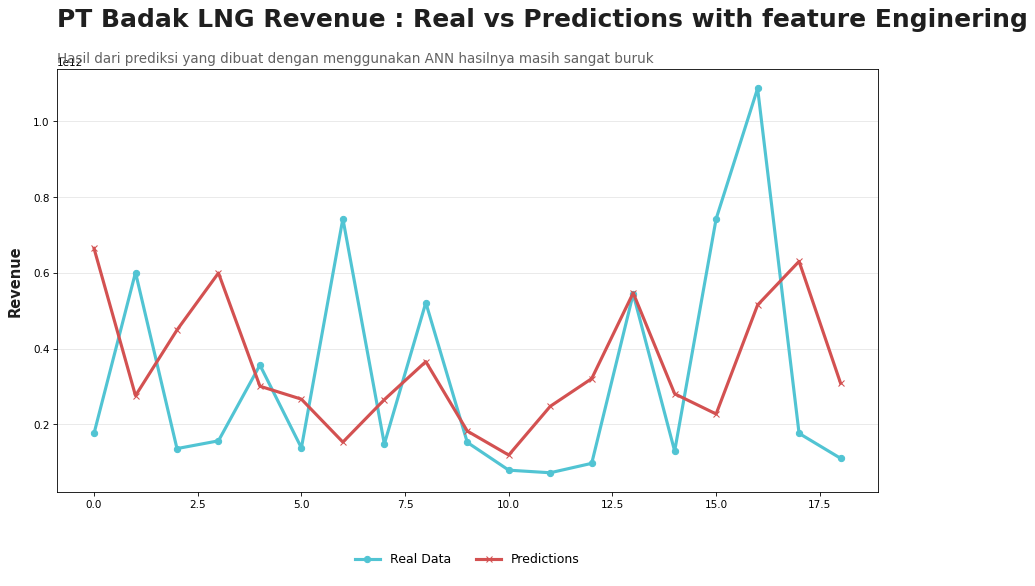

In [232]:
title_ann_standard = 'PT Badak LNG Revenue : Real vs Predictions with feature Enginering'
subtitle_ann_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN hasilnya masih sangat buruk'
plot_predictions(y_test_inv_series, y_pred_3_inv, title_ann_standard, subtitle_ann_standard)

#### Correlation Testing

In [233]:
pearson_correlation = df_ann_ohe.corr(method='pearson')
pearson_correlation

,TOTAL REVENUE (Rp),day_of_month,day_of_week,month,year,PANDEMI_PPKM DARURAT,"PANDEMI_PPKM LEVEL 1, 2 & 3","PANDEMI_PPKM LEVEL 2, 3 & 4",PANDEMI_PPKM LEVEL 3 & 4,PANDEMI_PPKM MIKRO,PANDEMI_PSBB,PANDEMI_PSBB KETAT,PANDEMI_PSBB TRANSASISI,PANDEMI_PSSB TRANSISI FASE 2
TOTAL REVENUE (Rp),1.000000,0.103363,-0.080408,-0.115837,-0.102930,-0.027037,-0.026485,-0.124608,-0.003912,-0.047450,0.060758,-0.024245,0.265699,-0.148893
day_of_month,0.103363,1.000000,-0.000772,-0.062959,-0.006529,-0.102062,-0.029846,-0.139163,0.078144,0.186543,0.067594,-0.017271,-0.090086,0.060963
day_of_week,-0.080408,-0.000772,1.000000,0.053973,-0.104865,0.195879,-0.178835,-0.120752,0.229183,-0.055029,0.042402,0.186694,-0.007130,-0.027804
month,-0.115837,-0.062959,0.053973,1.000000,-0.486955,0.044185,0.340591,0.214059,0.085643,-0.483132,-0.160713,0.288339,0.129854,0.521937
year,-0.102930,-0.006529,-0.104865,-0.486955,1.000000,0.159239,0.185146,0.185146,0.159239,0.549965,-0.372715,-0.372715,-0.466588,-0.436657
PANDEMI_PPKM DARURAT,-0.027037,-0.102062,0.195879,0.044185,0.159239,1.000000,-0.047782,-0.047782,-0.041096,-0.141933,-0.059351,-0.059351,-0.074299,-0.069533
"PANDEMI_PPKM LEVEL 1, 2 & 3",-0.026485,-0.029846,-0.178835,0.340591,0.185146,-0.047782,1.000000,-0.055556,-0.047782,-0.165025,-0.069007,-0.069007,-0.086387,-0.080845
"PANDEMI_PPKM LEVEL 2, 3 & 4",-0.124608,-0.139163,-0.120752,0.214059,0.185146,-0.047782,-0.055556,1.000000,-0.047782,-0.165025,-0.069007,-0.069007,-0.086387,-0.080845
PANDEMI_PPKM LEVEL 3 & 4,-0.003912,0.078144,0.229183,0.085643,0.159239,-0.041096,-0.047782,-0.047782,1.000000,-0.141933,-0.059351,-0.059351,-0.074299,-0.069533
PANDEMI_PPKM MIKRO,-0.047450,0.186543,-0.055029,-0.483132,0.549965,-0.141933,-0.165025,-0.165025,-0.141933,1.000000,-0.204980,-0.204980,-0.256607,-0.240146


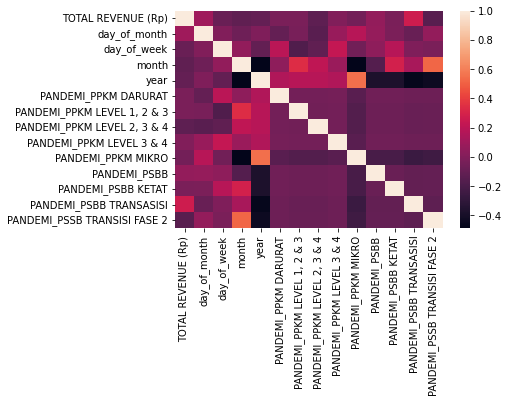

In [234]:
sns.heatmap(pearson_correlation)

# LSTM - DATA (INDONESIA (2) SHEET) - Multivariate Variable

In [235]:
df_lstm = df_crop
df_lstm.head()

,DEPARTURE DATE,TOTAL REVENUE (Rp),PANDEMI,day_of_month,day_of_week,month,year
0,2016-04-07,168671897991,NORMAL,7,3,4,2016
1,2016-04-16,990261460307,NORMAL,16,5,4,2016
2,2016-04-28,994021408053,NORMAL,28,3,4,2016
3,2016-05-11,1193398550191,NORMAL,11,2,5,2016
4,2016-05-21,1137267278862,NORMAL,21,5,5,2016


## One Hot Encoding

In [236]:
df_lstm_ohe = pd.get_dummies(df_lstm, columns=['PANDEMI'], drop_first=True)
df_lstm_ohe.head()

,DEPARTURE DATE,TOTAL REVENUE (Rp),day_of_month,day_of_week,month,year,PANDEMI_PPKM,PANDEMI_PPKM DARURAT,"PANDEMI_PPKM LEVEL 1, 2 & 3","PANDEMI_PPKM LEVEL 2, 3 & 4",PANDEMI_PPKM LEVEL 3 & 4,PANDEMI_PPKM MIKRO,PANDEMI_PSBB,PANDEMI_PSBB KETAT,PANDEMI_PSBB TRANSASISI,PANDEMI_PSSB TRANSISI FASE 2
0,2016-04-07,168671897991,7,3,4,2016,0,0,0,0,0,0,0,0,0,0
1,2016-04-16,990261460307,16,5,4,2016,0,0,0,0,0,0,0,0,0,0
2,2016-04-28,994021408053,28,3,4,2016,0,0,0,0,0,0,0,0,0,0
3,2016-05-11,1193398550191,11,2,5,2016,0,0,0,0,0,0,0,0,0,0
4,2016-05-21,1137267278862,21,5,5,2016,0,0,0,0,0,0,0,0,0,0


## Normalization Revenue

In [244]:
revenue_lstm = StandardScaler()

revenue_scaled = df_lstm_ohe['TOTAL REVENUE (Rp)']
revenue_scaled = revenue_lstm.fit_transform(revenue_scaled.values.reshape(-1,1))
df_lstm_ohe['Revenue Scaled'] = revenue_scaled
df_lstm_ohe.head()

,DEPARTURE DATE,TOTAL REVENUE (Rp),day_of_month,day_of_week,month,year,PANDEMI_PPKM,PANDEMI_PPKM DARURAT,"PANDEMI_PPKM LEVEL 1, 2 & 3","PANDEMI_PPKM LEVEL 2, 3 & 4",PANDEMI_PPKM LEVEL 3 & 4,PANDEMI_PPKM MIKRO,PANDEMI_PSBB,PANDEMI_PSBB KETAT,PANDEMI_PSBB TRANSASISI,PANDEMI_PSSB TRANSISI FASE 2,Revenue Scaled
0,2016-04-07,168671897991,7,3,4,2016,0,0,0,0,0,0,0,0,0,0,-0.951078
1,2016-04-16,990261460307,16,5,4,2016,0,0,0,0,0,0,0,0,0,0,1.010439
2,2016-04-28,994021408053,28,3,4,2016,0,0,0,0,0,0,0,0,0,0,1.019416
3,2016-05-11,1193398550191,11,2,5,2016,0,0,0,0,0,0,0,0,0,0,1.495422
4,2016-05-21,1137267278862,21,5,5,2016,0,0,0,0,0,0,0,0,0,0,1.361410


## Split Dataset 70:30

In [245]:
df_lstm_ohe = df_lstm_ohe.set_index('DEPARTURE DATE')
df_lstm_ohe.head()

,TOTAL REVENUE (Rp),day_of_month,day_of_week,month,year,PANDEMI_PPKM,PANDEMI_PPKM DARURAT,"PANDEMI_PPKM LEVEL 1, 2 & 3","PANDEMI_PPKM LEVEL 2, 3 & 4",PANDEMI_PPKM LEVEL 3 & 4,PANDEMI_PPKM MIKRO,PANDEMI_PSBB,PANDEMI_PSBB KETAT,PANDEMI_PSBB TRANSASISI,PANDEMI_PSSB TRANSISI FASE 2,Revenue Scaled
DEPARTURE DATE,,,,,,,,,,,,,,,,
2016-04-07,168671897991,7,3,4,2016,0,0,0,0,0,0,0,0,0,0,-0.951078
2016-04-16,990261460307,16,5,4,2016,0,0,0,0,0,0,0,0,0,0,1.010439
2016-04-28,994021408053,28,3,4,2016,0,0,0,0,0,0,0,0,0,0,1.019416
2016-05-11,1193398550191,11,2,5,2016,0,0,0,0,0,0,0,0,0,0,1.495422
2016-05-21,1137267278862,21,5,5,2016,0,0,0,0,0,0,0,0,0,0,1.361410


In [246]:
train_size = int(len(df_lstm_ohe) * 0.7)
test_size = len(df_lstm_ohe) - train_size
train, test = df_lstm_ohe.iloc[0:train_size], df_lstm_ohe.iloc[train_size:len(df)]
print(len(train), len(test))

170 73


## Normalization Features

In [247]:
features_lstm_train = MinMaxScaler()
features_lstm_test = MinMaxScaler()

features_train = train.drop(['TOTAL REVENUE (Rp)', 'day_of_month', 'Revenue Scaled'], axis='columns')
features_test = test.drop(['TOTAL REVENUE (Rp)', 'day_of_month', 'Revenue Scaled'], axis='columns')
label_train = train['Revenue Scaled']
label_test = test['Revenue Scaled']

train_features_scaled = features_lstm_train.fit_transform(features_train)
test_features_scaled = features_lstm_test.fit_transform(features_test)

## Create Sequence Dataset

In [250]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [251]:
time_steps = 7

x_train, y_train = create_dataset(train_features_scaled, label_train, time_steps)
x_test, y_test = create_dataset(test_features_scaled, label_test, time_steps)

In [252]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(163, 7, 13) (163,)
(66, 7, 13) (66,)


## LSTM Model

In [258]:
model_lstm_multi = tf.keras.Sequential()

model_lstm_multi.add(tf.keras.layers.LSTM(50,return_sequences = True,  input_shape=(x_train.shape[1], x_train.shape[2])))
model_lstm_multi.add(tf.keras.layers.Dropout(rate=0.2))
model_lstm_multi.add(tf.keras.layers.LSTM(units = 50))
model_lstm_multi.add(tf.keras.layers.Dropout(0.2))
model_lstm_multi.add(tf.keras.layers.Dense(units=1))
model_lstm_multi.compile(loss='mean_squared_error', optimizer='adam')

In [259]:
history = model_lstm_multi.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    shuffle=False,
    verbose=0
)

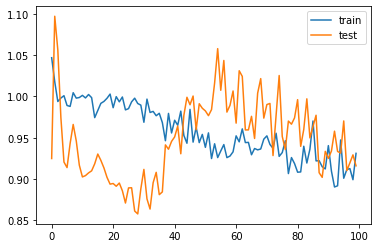

In [260]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [261]:
pred_lstm_multi = model_lstm_multi.predict(x_test)

## Evaluation

In [262]:
len(y_test), len(pred_lstm_multi)

(66, 66)

In [265]:
y_test_inv = revenue_lstm.inverse_transform(y_test.reshape(-1,1))
y_pred_lstm_multi_inv = revenue_lstm.inverse_transform(pred_lstm_multi)
y_test_inv.shape, y_pred_lstm_multi_inv.shape 

((66, 1), (66, 1))

In [267]:
MSE_LSTM_Standard = mse(y_test_inv, y_pred_lstm_multi_inv)
MAE_LSTM_Standard = mae(y_test_inv, y_pred_lstm_multi_inv)

print(f'Mean Squared Error : {MSE_LSTM_Standard}')
print(f'Mean Absolute Error : {MAE_LSTM_Standard}')

Mean Squared Error : 3.801954297808891e+23
Mean Absolute Error : 553245802496.0


## Visualization

In [268]:
y_test_inv_series = pd.Series(y_test_inv.squeeze())
y_test_inv_series = y_test_inv_series.rename('TOTAL REVENUE (Rp)')

y_pred_lstm_multi_inv = y_pred_lstm_multi_inv.squeeze()

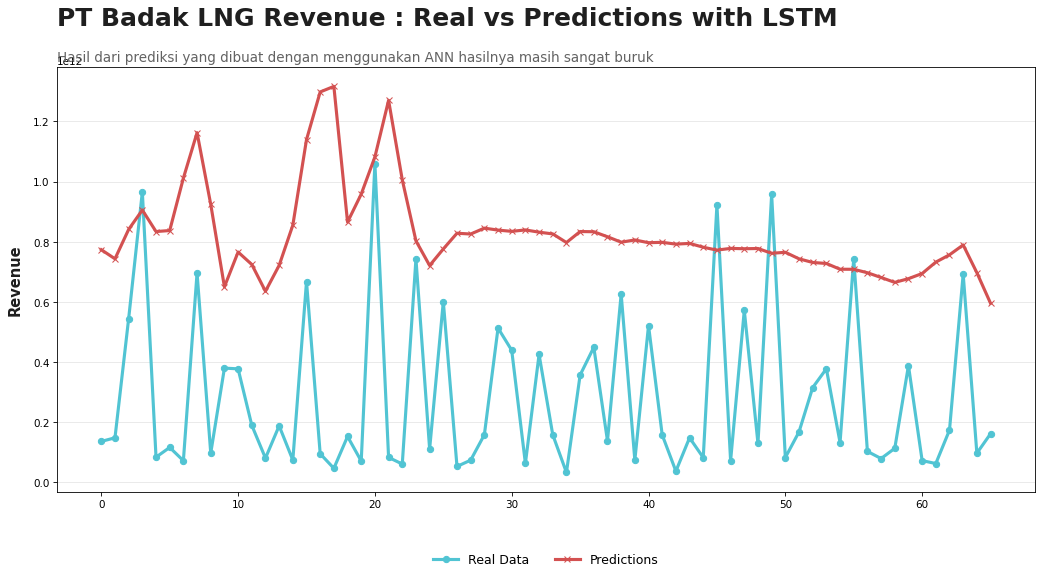

In [269]:
title_lstm_standard = 'PT Badak LNG Revenue : Real vs Predictions with LSTM'
subtitle_lstm_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN hasilnya masih sangat buruk'
y_test_series = pd.Series(y_test)
y_test_series.name = 'TOTAL REVENUE (Rp)'
plot_predictions(y_test_inv_series, y_pred_lstm_multi_inv, title_lstm_standard, subtitle_lstm_standard)

# Make Dataset Univariete with past revenue

## Prepare Dataset

In [270]:
def prepare_data_revenue_past(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		end_ix = i + n_features

		if end_ix > len(timeseries_data)-1:
			break

		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [271]:
revenue_list = df_crop['TOTAL REVENUE (Rp)'].tolist()
n_step = 5

X, y = prepare_data_revenue_past(revenue_list, n_step)
X.shape, y.shape

((238, 5), (238,))

In [272]:
df_univariate = pd.DataFrame(data=X,
                             columns=['Revenue Past day 5','Revenue Past day 4','Revenue Past day 3','Revenue Past day 2','Revenue Past day 1'])
df_univariate['Revenue Today'] = y
df_univariate.head()

,Revenue Past day 5,Revenue Past day 4,Revenue Past day 3,Revenue Past day 2,Revenue Past day 1,Revenue Today
0,168671897991,990261460307,994021408053,1193398550191,1137267278862,133164900692
1,990261460307,994021408053,1193398550191,1137267278862,133164900692,658085479757
2,994021408053,1193398550191,1137267278862,133164900692,658085479757,656348412009
3,1193398550191,1137267278862,133164900692,658085479757,656348412009,223350129292
4,1137267278862,133164900692,658085479757,656348412009,223350129292,854950827223


## Correlation Test - Revenue Past

### Pearson Correlation

In [273]:
pearson_correlation = df_univariate.corr(method='pearson')
pearson_correlation

,Revenue Past day 5,Revenue Past day 4,Revenue Past day 3,Revenue Past day 2,Revenue Past day 1,Revenue Today
Revenue Past day 5,1.000000,-0.103149,0.219179,0.232934,0.119218,0.251864
Revenue Past day 4,-0.103149,1.000000,-0.094135,0.221964,0.244994,0.129846
Revenue Past day 3,0.219179,-0.094135,1.000000,-0.099760,0.220670,0.243604
Revenue Past day 2,0.232934,0.221964,-0.099760,1.000000,-0.107944,0.214497
Revenue Past day 1,0.119218,0.244994,0.220670,-0.107944,1.000000,-0.112536
Revenue Today,0.251864,0.129846,0.243604,0.214497,-0.112536,1.000000


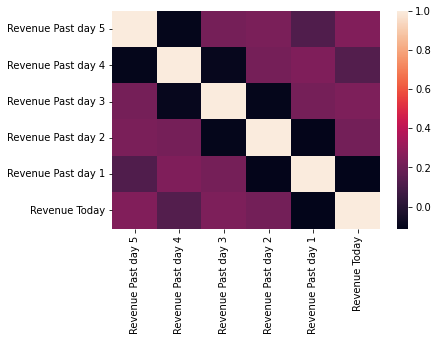

In [274]:
sns.heatmap(pearson_correlation)

### Spearman Correlation

In [275]:
spearman_correlation = df_univariate.corr(method='spearman')
spearman_correlation

,Revenue Past day 5,Revenue Past day 4,Revenue Past day 3,Revenue Past day 2,Revenue Past day 1,Revenue Today
Revenue Past day 5,1.000000,-0.033540,0.264125,0.257348,0.201786,0.284793
Revenue Past day 4,-0.033540,1.000000,-0.024903,0.266178,0.271015,0.212707
Revenue Past day 3,0.264125,-0.024903,1.000000,-0.030808,0.264872,0.268990
Revenue Past day 2,0.257348,0.266178,-0.030808,1.000000,-0.038806,0.259335
Revenue Past day 1,0.201786,0.271015,0.264872,-0.038806,1.000000,-0.041665
Revenue Today,0.284793,0.212707,0.268990,0.259335,-0.041665,1.000000


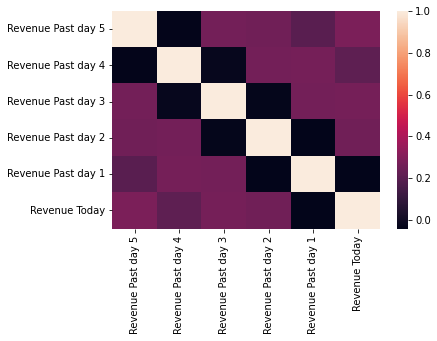

In [276]:
sns.heatmap(spearman_correlation)

## MinMax Normalization

In [285]:
revenue_uni = MinMaxScaler()

revenue_uni_scaled = revenue_uni.fit_transform(df_univariate[['Revenue Today']])
df_univariate['Revenue Today Scaled'] = revenue_uni_scaled
df_univariate.head()

,Revenue Past day 5,Revenue Past day 4,Revenue Past day 3,Revenue Past day 2,Revenue Past day 1,Revenue Today,Revenue Today Scaled
0,168671897991,990261460307,994021408053,1193398550191,1137267278862,133164900692,0.067524
1,990261460307,994021408053,1193398550191,1137267278862,133164900692,658085479757,0.418892
2,994021408053,1193398550191,1137267278862,133164900692,658085479757,656348412009,0.417729
3,1193398550191,1137267278862,133164900692,658085479757,656348412009,223350129292,0.127892
4,1137267278862,133164900692,658085479757,656348412009,223350129292,854950827223,0.550668


In [286]:
train_size = int(len(df_univariate) * 0.7)
test_size = len(df_univariate) - train_size
train_uni, test_uni = df_univariate.iloc[0:train_size], df_univariate.iloc[train_size:len(df_univariate)]
print(len(train_uni), len(test_uni))

166 72


In [287]:
features_train_uni = train_uni.drop(['Revenue Today', 'Revenue Today Scaled'], axis='columns')
features_test_uni = test_uni.drop(['Revenue Today', 'Revenue Today Scaled'], axis='columns')
revenue_train_uni = train_uni['Revenue Today Scaled']
revenue_test_uni = test_uni['Revenue Today Scaled']

In [288]:
print(f'Training X : {features_train_uni.shape} - Y : {revenue_train_uni.shape}')
print(f'Test X : {features_test_uni.shape} - Y : {revenue_test_uni.shape}')

Training X : (166, 5) - Y : (166,)
Test X : (72, 5) - Y : (72,)


In [289]:
features_uni_train = MinMaxScaler()
features_uni_test = MinMaxScaler()


train_features_uni_scaled = features_uni_train.fit_transform(features_train_uni)
test_features_uni_scaled = features_uni_test.fit_transform(features_test_uni)

In [290]:
n_features = 1

train_features_uni_scaled = train_features_uni_scaled.reshape(train_features_uni_scaled.shape[0], train_features_uni_scaled.shape[1], n_features)
test_features_uni_scaled = test_features_uni_scaled.reshape(test_features_uni_scaled.shape[0], test_features_uni_scaled.shape[1], n_features)

print(f'Training X : {train_features_uni_scaled.shape} - Y : {revenue_train_uni.shape}')
print(f'Test X : {test_features_uni_scaled.shape} - Y : {revenue_test_uni.shape}')

Training X : (166, 5, 1) - Y : (166,)
Test X : (72, 5, 1) - Y : (72,)


## LSTM Uni Model

In [291]:
# define model
model_lstm_uni = tf.keras.models.Sequential()
model_lstm_uni.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(n_step, n_features)))
model_lstm_uni.add(tf.keras.layers.LSTM(50, activation='relu'))
model_lstm_uni.add(tf.keras.layers.Dense(1))
model_lstm_uni.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
# fit model
history_uni = model_lstm_uni.fit(train_features_uni_scaled, 
          revenue_train_uni, 
          epochs=100, 
          validation_split=0.1,
          shuffle=False,
          verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 108ms/step - loss: 0.2684 - mse: 0.2684 - mae: 0.4362 - val_loss: 0.1215 - val_mse: 0.1215 - val_mae: 0.2664
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 0.2359 - mse: 0.2359 - mae: 0.3973 - val_loss: 0.1033 - val_mse: 0.1033 - val_mae: 0.2307
Epoch 3/100
5/5 [==============================] - 0s 12ms/step - loss: 0.2018 - mse: 0.2018 - mae: 0.3589 - val_loss: 0.0850 - val_mse: 0.0850 - val_mae: 0.2089
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1657 - mse: 0.1657 - mae: 0.3294 - val_loss: 0.0672 - val_mse: 0.0672 - val_mae: 0.2022
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1278 - mse: 0.1278 - mae: 0.3046 - val_loss: 0.0540 - val_mse: 0.0540 - val_mae: 0.2034
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0945 - mse: 0.0945 - mae: 0.2752 - val_loss: 0.0556 - val_mse: 0.0556 - val_mae: 0.2217
Epoch 7/100
5/5 [==========

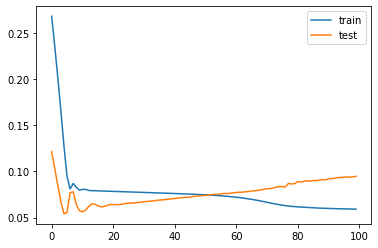

In [292]:
plt.plot(history_uni.history['loss'], label='train')
plt.plot(history_uni.history['val_loss'], label='test')
plt.legend();

## Evaluation

In [293]:
pred_lstm_uni = model_lstm_uni.predict(test_features_uni_scaled)

In [294]:
len(pred_lstm_uni), len(revenue_test_uni)

(72, 72)

In [301]:
y_test_inv = revenue_uni.inverse_transform(revenue_test_uni.to_numpy().reshape(-1,1))
y_pred_lstm_uni_inv = revenue_uni.inverse_transform(pred_lstm_uni)
y_test_inv.shape, y_pred_lstm_uni_inv.shape 

((72, 1), (72, 1))

In [302]:
MSE_LSTM_uni = mse(y_test_inv, y_pred_lstm_uni_inv)
MAE_LSTM_uni = mae(y_test_inv, y_pred_lstm_uni_inv)

print(f'Mean Squared Error : {MSE_LSTM_uni}')
print(f'Mean Absolute Error : {MAE_LSTM_uni}')

Mean Squared Error : 3.3541613868594425e+23
Mean Absolute Error : 523595055104.0


## Visualization

In [303]:
y_test_inv_series = pd.Series(y_test_inv.squeeze())
y_test_inv_series = y_test_inv_series.rename('TOTAL REVENUE (Rp)')

y_pred_lstm_uni_inv = y_pred_lstm_uni_inv.squeeze()

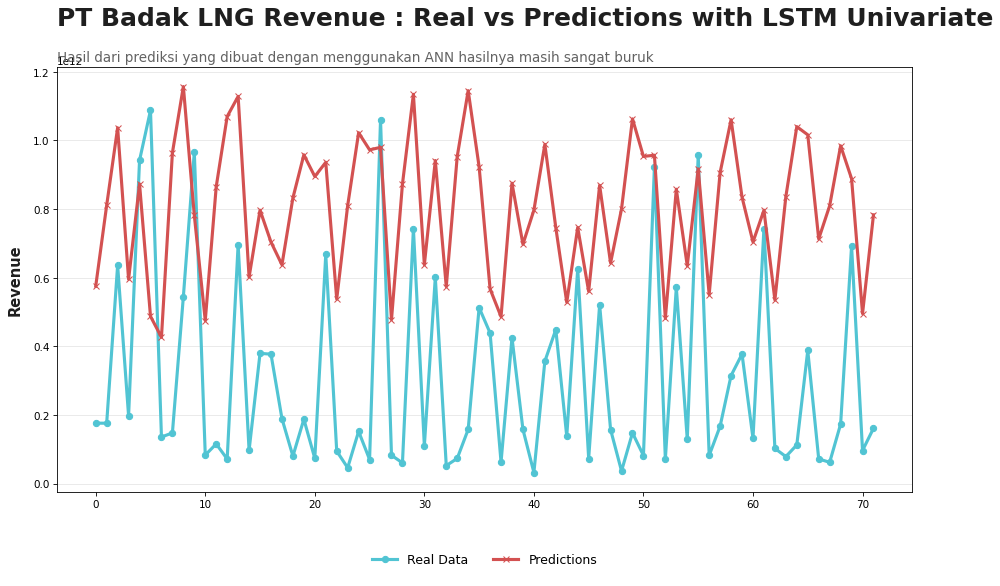

In [304]:
title_lstm_standard = 'PT Badak LNG Revenue : Real vs Predictions with LSTM Univariate'
subtitle_lstm_standard = 'Hasil dari prediksi yang dibuat dengan menggunakan ANN hasilnya masih sangat buruk'
y_test_series = pd.Series(y_test)
y_test_series.name = 'TOTAL REVENUE (Rp)'
plot_predictions(y_test_inv_series, y_pred_lstm_uni_inv, title_lstm_standard, subtitle_lstm_standard)